In [1]:

import itertools
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

%matplotlib inline

## 2. Linear Regression MRL Model

### 2.1 Linear Regression without position information

In [2]:
################### Provided functions, you will not need to edit these ##################################3

def load_data():
    data = pandas.read_csv('mrl_dataset.csv', index_col=0)
    # Retain only 280k with the highest number of reads
    data.sort_values('total_reads', inplace=True, ascending=False)
    data.reset_index(inplace=True, drop=True)
    # Random shuffle
    data = data.sample(frac=1, random_state=1).reset_index(drop=True)
    # Split into training and test datasets
    data_train = data.iloc[2000:10000]
    data_test = data.iloc[:2000]
    return data_train, data_test


#load train and test datasets 
data_train, data_test = load_data()
print(f'Number of sequences in training set: {data_train.shape[0]}')
print(f'Number of sequences in test set:     {data_test.shape[0]}')
data_test.head()

Number of sequences in training set: 8000
Number of sequences in test set:     2000


,utr,total_reads,rl,full_utr
0,TTCAGTAACCGTGCGTCTGCAATGTGTTCAGACTCCCCGAGTACCT...,1954,5.592195,GGGACATCGTAGAGAGTCGTACTTATTCAGTAACCGTGCGTCTGCA...
1,TAATTAGAGGGTTGAAAGCGACATCGACAGAAGGGTCTACTTGATA...,1434,8.217159,GGGACATCGTAGAGAGTCGTACTTATAATTAGAGGGTTGAAAGCGA...
2,GTGGCGATAGTAGCGGAAGGCCAACTAAGGCCGAAAGAAATGGTAA...,2721,4.862709,GGGACATCGTAGAGAGTCGTACTTAGTGGCGATAGTAGCGGAAGGC...
3,GGCACATTGGATAATAGGCACGAGTGGCAAGTCCAAGTCTCTCGAC...,1484,7.629858,GGGACATCGTAGAGAGTCGTACTTAGGCACATTGGATAATAGGCAC...
4,CCGGCTATACAAAAATGCGGCGAGCCAGTTGTGGCCAGTCGTAAGG...,1363,4.520813,GGGACATCGTAGAGAGTCGTACTTACCGGCTATACAAAAATGCGGC...


In [53]:
################ You will need to edit these functions for 2.1 ############################

# Note: if confused about intended usage of these functions, see cell below this one where they are implemented.

###############################
def create_kmer_dict(k):
    # Create dictionary where the keys are kmer strings, and the value for each key is an integer index,
    #  i.e. kmer_dict.values should return an np.array equal to range(4**k) This function will be used to
    #  create consistent indexing for kmers across the other functions in this cell & notebook.
    bases = ['A', 'C', 'G', 'T']

    kmer_dict = {}
    for i, kmer in zip(range(4**k), itertools.product('ACGT', repeat=k)):
        string = ''.join(kmer)
        kmer_dict[string] = i

    return kmer_dict

def count_kmers(s, kmer_dict,k):
    #creates feature matrix for a list of sequences 
    #input: list of utr sequences s 
    #output: the filled feature matrix counts 
    bases = ['A', 'C', 'G', 'T']
    counts = numpy.zeros((len(s), len(bases)**k)) 
    
    #TODO: fill in counts matrix for the list of sequences s (see example image on Canvas)
    for i, seq in zip(range(len(s)), s):
        # look at each kmer in the seq, then increment the count of that kmer
        for j in range(len(seq) - k + 1):
            kmer = seq[j : j + k]
            counts[i][kmer_dict[kmer]] += 1
    
    return counts

def prepare_data_for_linear_regression(data_train, data_test, kmer_dict, k):
    # Preprocess training and test data
    #take in data_train and data_test pandas dataframes, k of the current model 
    training_sequences = data_train['utr'].values
    test_sequences = data_test['utr'].values
    train_y = data_train['rl'].values
    test_y = data_test['rl'].values
    
    #TODO: use count_kmers to make numpy matrices for the training and test sequences. Should have
    #  dims (data_train.shape[0] x len(kmer_dict)), (data_test.shape[0] x len(kmer_dict))
    train_X_mat = count_kmers(training_sequences, kmer_dict, k)
    test_X_mat = count_kmers(test_sequences, kmer_dict, k)
    
    #TODO: Add a bias term to the train and test matrices (add a column of all 1's to each X matrix)
    # for example, use numpy.hstack. HINT: Use print statements to confirm you have the right dimensions!
    train_X_mat = numpy.hstack((train_X_mat, numpy.ones((data_train.shape[0], 1))))
    test_X_mat = numpy.hstack((test_X_mat, numpy.ones((data_test.shape[0], 1))))
    # the egregious amount of parentheses are necessary to make things tuples
    
    return train_X_mat, train_y, test_X_mat, test_y

def solve_linear_regression_sklearn(train_X_mat, train_y):
    #return the trained sckit learn linear regression model 

    model = LinearRegression()
    # TODO: Solve equation system using sci-kit learn LinearRegression model. This should be a one-liner!
    #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
    model.fit(train_X_mat, train_y)
    
    return model

def calculate_mse(predicted, true):
    #TODO return the mean squared error (MSE) for the predicted and true MRL values
    mse = 0
    for guess, actual in zip(predicted, true):
        mse += (guess - actual) ** 2
    mse /= len(predicted)
    return mse


K =  1
4


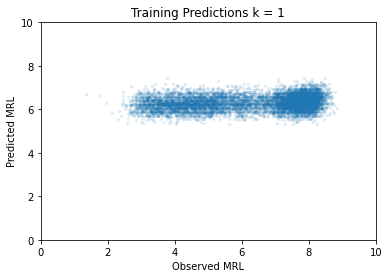

Train r^2:  0.036812004246226326
Train MSE:  2.797744831237944


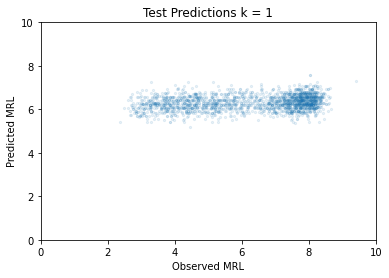

Test r^2:  0.04450108098263872
Test MSE:  2.8524185576301915
K =  2
16


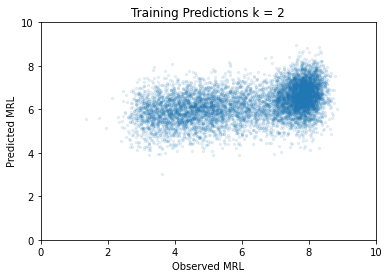

Train r^2:  0.19319801250061397
Train MSE:  2.343494832068004


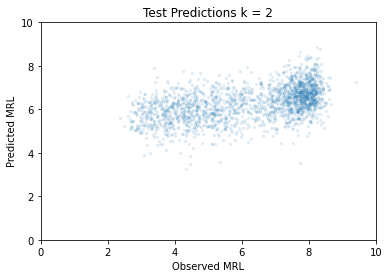

Test r^2:  0.2330131560610541
Test MSE:  2.289659845308431
K =  3
64


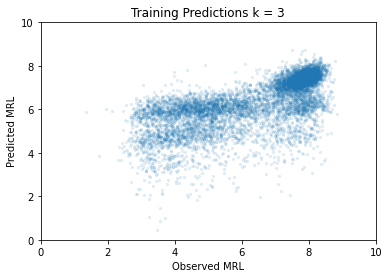

Train r^2:  0.4459672455634751
Train MSE:  1.6092832156284085


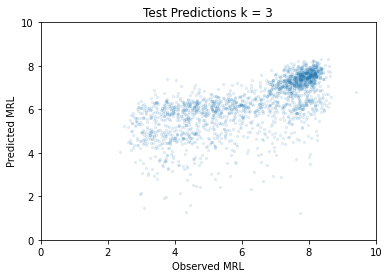

Test r^2:  0.45616488534274247
Test MSE:  1.6234925466316723
K =  4
256


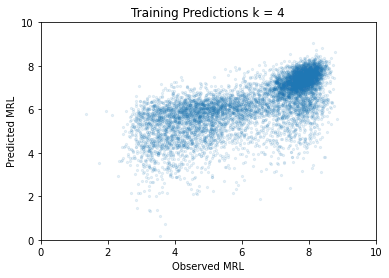

Train r^2:  0.48452537652240224
Train MSE:  1.497284507102025


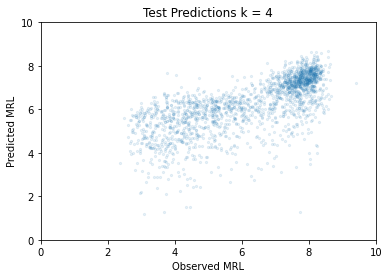

Test r^2:  0.4820437502520205
Test MSE:  1.5462372478046007
K =  5
1024


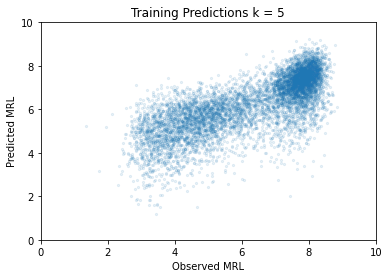

Train r^2:  0.5552248631849821
Train MSE:  1.2919257149935215


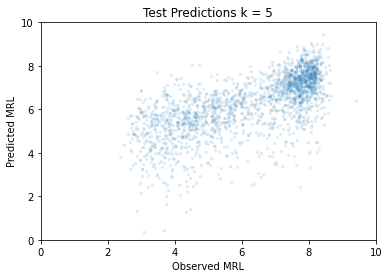

Test r^2:  0.43438990473370176
Test MSE:  1.6884966586668173


In [56]:
#2.1
################### Don't need to edit these, just run this cell ####################################
# Run k-mer linear regressions for k=1-6 with positions, plotting the results & calculating MSE and r
ks = []
train_mse = []
train_r = []
test_mse = []
test_r = []

for k in range(1, 6): 
    #for each k, make a linear model without position, get the mse and r^2
    print ("K = ", k)
    #1) Create the k-mer dictionary 
    kmer_dict = create_kmer_dict(k)
    print (len(kmer_dict))
    #2) Count k-mers in the sequences in the train and test sets, represent them as matrices to solve the linear equation  
    train_X_mat, train_y, test_X_mat, test_y = prepare_data_for_linear_regression(data_train, data_test, kmer_dict, k)
    #3) Do the linear regression, get the weights 
    model = solve_linear_regression_sklearn(train_X_mat, train_y)
    #4) Make linear regression predictions for train and test set
    train_pred = model.predict(train_X_mat)
    test_pred = model.predict(test_X_mat)
    #6) Graph predictions, calculate MSE and r of the train and test sets
    plt.scatter(train_y, train_pred, s=5, alpha=0.1)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Observed MRL')
    plt.ylabel('Predicted MRL')
    plt.title("Training Predictions k = " + str(k))
    plt.show()
    print ("Train r^2: ", model.score(train_X_mat,  train_y))
    print ("Train MSE: ", calculate_mse(train_pred, train_y))
    plt.scatter(test_y, test_pred, s=5, alpha=0.1)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Observed MRL')
    plt.ylabel('Predicted MRL')
    plt.title("Test Predictions k = " + str(k))
    plt.show()
    print ("Test r^2: ", model.score(test_X_mat,  test_y))
    print ("Test MSE: ", calculate_mse(test_pred, test_y))
    #stats for overall graphs 
    ks.append(k)
    train_mse.append(calculate_mse(train_pred, train_y))
    train_r.append(model.score(train_X_mat,  train_y))
    test_mse.append(calculate_mse(test_pred, test_y))
    test_r.append(model.score(test_X_mat, test_y))



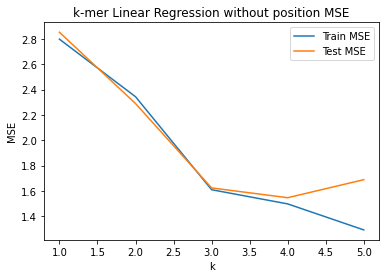

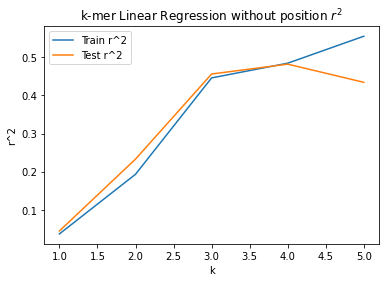

In [57]:
################### Don't need to edit these, just run this cell ####################################

#2.1 
#### plotting overall mse and r performacnce based on k
plt.plot(ks, train_mse, label = 'Train MSE')
plt.plot(ks, test_mse, label = "Test MSE")
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("k-mer Linear Regression without position MSE")
plt.legend()
plt.show()

#plotting overall r performacnce based on k
plt.plot(ks, train_r, label = 'Train r^2')
plt.plot(ks, test_r, label = "Test r^2")
plt.xlabel("k")
plt.ylabel("r^2")
plt.title("k-mer Linear Regression without position $r^2$")
plt.legend()
plt.show()

How does MSE and $r^2$ change as $k$ increases? Naively, one might assume that increasing $k$ will allow your model to capture more complex features of the data and in turn train a better model. Do you see this trend in your models? Write your answer in the markup cell below.

### 2.2 Linear Regression with position information

In [ ]:
################ You will need to edit these functions for 2.2 ############################

def count_kmers_with_positions(s, kmer_dict, k):
    #for every sequence in list s, count the number of kmers with position information (see example in instructions)
    stride = 3
    counts = numpy.zeros((len(s), 4**k * stride))
    #TODO: fill in counts matrix
    return counts

def prepare_data_for_linear_regression_with_positions(data_train, data_test, kmer_dict, k):
    # Preprocess training and test data
    #take in data_train and data_test pandas dataframes, k of the current model 
    training_sequences = data_train['utr'].values
    test_sequences = data_test['utr'].values
    train_y = data_train['rl'].values
    test_y = data_test['rl'].values
    
    #TODO: use count_kmers_with_positions to process the training and test sets 
    
    return train_X_mat, train_y, test_X_mat, test_y

In [ ]:
#2.2

################### Don't need to edit these, just run this cell ####################################

# Run k-mer linear regressions for k=1-6 with positions, plotting the results & calculating MSE and r
ks = []
train_mse = []
train_r = []
test_mse = []
test_r = []

for k in range(1, 6): 
    #for each k, make a linear model without position, get the mse and r^2
    print ("K = ", k)
    #1) Create the k-mer dictionary 
    kmer_dict = create_k_mer_dict(k)
    #2) Count k-mers in the sequences in the train and test sets, represent them as matrices to solve the linear equation  
    train_X_mat, train_y, test_X_mat, test_y = prepare_data_for_linear_regression_with_positions(data_train, data_test, kmer_dict, k)
    #3) Do the linear regression, get the weights 
    model = solve_linear_regression_sklearn(train_X_mat, train_y)
    #4) Make linear regression predictions for train and test set
    train_pred = model.predict(train_X_mat)
    test_pred = model.predict(test_X_mat)
    #6) Graph predictions, calculate MSE and r of the train and test sets
    plt.scatter(train_y, train_pred, s=5, alpha=0.1)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Observed MRL')
    plt.ylabel('Predicted MRL')
    plt.title("Training Predictions k = " + str(k))
    plt.show()
    print ("Train r^2: ", model.score(train_X_mat,  train_y))
    print ("Train MSE: ", calculate_mse(train_pred, train_y))
    plt.scatter(test_y, test_pred, s=5, alpha=0.1)
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('Observed MRL')
    plt.ylabel('Predicted MRL')
    plt.title("Test Predictions k = " + str(k))
    plt.show()
    print ("Test r^2: ", model.score(test_X_mat,  test_y))
    print ("Test MSE: ", calculate_mse(test_pred, test_y))
    #stats for overall graphs 
    ks.append(k)
    train_mse.append(calculate_mse(train_pred, train_y))
    train_r.append(r2(train_pred, train_y ))
    test_mse.append(calculate_mse(test_pred, test_y))
    test_r.append(r2(test_pred, test_y ))



In [ ]:
################### Don't need to edit these, just run this cell ####################################

#2.2 
#### plotting overall mse and r performacnce based on k

plt.plot(ks, train_mse, label = 'Train MSE')
plt.plot(ks, test_mse, label = "Test MSE")
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("k-mer Linear Regression with positions MSE")
plt.legend()
plt.show()

#plotting overall r performacnce based on k
plt.plot(ks, train_r, label = 'Train MSE')
plt.plot(ks, test_r, label = "Test MSE")
plt.xlabel("k")
plt.ylabel("r^2")
plt.title("k-mer Linear Regression with positions r^2")
plt.legend()
plt.show()

Does including position information improve prediction performance? Additionally, note that training and test performances deviate in both the MSE and $r^2$ metrics at the higher values of $k$. This deviation is more strongly apparent in the position model vs. the positionless model. What is the name of this pathology (i.e. systematic error in what the model has learned); why does it make sense to see this occur only in your higher-$k$ models; and why is this behavior more strongly evident in the position model vs. the positionless model? Write your answer in the markup cell below.